In [1]:
import pandas as pd

# 2 main datatypes in Pandas

## Series

1-dimensional datatype.

In [2]:
series = pd.Series(["KIA", "Toyota", "Honda", "Volkswagen"])

series

0           KIA
1        Toyota
2         Honda
3    Volkswagen
dtype: object

In [3]:
colors = pd.Series(["Red", "Green", "Blue", "White"])

colors

0      Red
1    Green
2     Blue
3    White
dtype: object

## Dataframe

2-dimensional datatype.

![](pandas-anatomy-of-a-dataframe.png)

In [4]:
car_data = pd.DataFrame({"Model" : series, "Color": colors})

car_data

,Model,Color
0,KIA,Red
1,Toyota,Green
2,Honda,Blue
3,Volkswagen,White


# Import data

In [5]:
car_sales = pd.read_csv("car-sales.csv")

In [6]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


# Exporting a dataframe

In [7]:
car_sales.to_csv("test_export.csv", index = False)

# Describing the data in Pandas

## Some useful attributes in a dataframe

In [8]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [9]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [10]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

## Some useful functions in a dataframe

In [11]:
# Works with only numeric columns
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [12]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [13]:
car_sales.mean()

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [14]:
car_sales.sum()

Make             ToyotaHondaToyotaBMWNissanToyotaHondaHondaToyo...
Colour               WhiteRedBlueBlackWhiteGreenBlueBlueWhiteWhite
Odometer (KM)                                               786014
Doors                                                           40
Price            $4,000.00$5,000.00$7,000.00$22,000.00$3,500.00...
dtype: object

In [15]:
car_sales["Doors"].sum()

40

# Viewing and selecting data in Pandas

In [16]:
# Amount of rows can be specified
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [17]:
car_sales.tail()

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [18]:
animals = pd.Series(["cat", "doggo", "snake", "cow", "panda"], index = [0, 3, 4, 8, 4])

In [19]:
animals

0      cat
3    doggo
4    snake
8      cow
4    panda
dtype: object

In [20]:
# Refers to index
animals.loc[4]

4    snake
4    panda
dtype: object

In [21]:
# Refers to position
animals.iloc[4]

'panda'

In [22]:
car_sales.iloc[:3]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"


In [23]:
# In this case the last item is included
car_sales.loc[:3]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"


In [24]:
# The same as car_sales["Make"]
car_sales.Make

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [25]:
# Boolean indexing
car_sales[car_sales["Make"] == "Toyota"]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [26]:
# Interesting...
car_sales["Odometer (KM)"] <= 50000

0    False
1    False
2     True
3     True
4    False
5    False
6     True
7    False
8    False
9     True
Name: Odometer (KM), dtype: bool

In [27]:
# Argegating 2 columns together
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [28]:
# Groups and gives mean of numerical values
car_sales.groupby(["Make"]).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


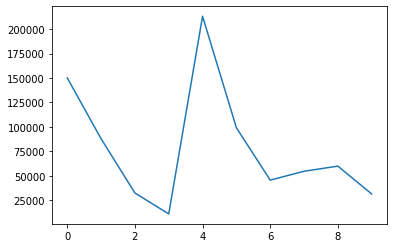

In [29]:
car_sales["Odometer (KM)"].plot()

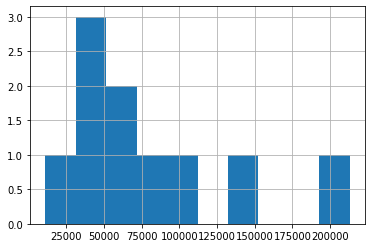

In [30]:
car_sales["Odometer (KM)"].hist()

In [31]:
car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]", "").astype(int)

In [32]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


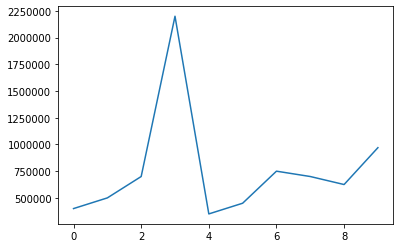

In [33]:
# I know about excess 2 zeros at the end
car_sales["Price"].plot()

# Manipulating data

In [34]:
# All the string methods in Python work in Pandas
car_sales["Make"].str.lower()

0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7     honda
8    toyota
9    nissan
Name: Make, dtype: object

## Working with missing data

In [35]:
car_sales_missing = pd.read_csv("car-sales-missing.csv")

In [36]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,NaN,White,150043.0,4.0,NaN
1,Honda,Red,87899.0,4.0,"$5,000.00"
2,Toyota,Blue,NaN,3.0,"$7,000.00"
3,BMW,Black,11179.0,5.0,"$22,000.00"
4,Nissan,NaN,213095.0,4.0,"$3,500.00"
5,Toyota,Green,NaN,NaN,"$4,500.00"
6,Honda,Blue,45698.0,4.0,NaN
7,Honda,Blue,54738.0,4.0,"$7,000.00"
8,Toyota,White,NaN,4.0,"$6,250.00"
9,NaN,White,31600.0,4.0,"$9,700.00"


In [37]:
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

In [38]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,NaN,White,150043.000000,4.0,NaN
1,Honda,Red,87899.000000,4.0,"$5,000.00"
2,Toyota,Blue,84893.142857,3.0,"$7,000.00"
3,BMW,Black,11179.000000,5.0,"$22,000.00"
4,Nissan,NaN,213095.000000,4.0,"$3,500.00"
5,Toyota,Green,84893.142857,NaN,"$4,500.00"
6,Honda,Blue,45698.000000,4.0,NaN
7,Honda,Blue,54738.000000,4.0,"$7,000.00"
8,Toyota,White,84893.142857,4.0,"$6,250.00"
9,NaN,White,31600.000000,4.0,"$9,700.00"


In [39]:
car_sales_missing_dropped = car_sales_missing.dropna()

In [40]:
car_sales_missing_dropped.to_csv("car-sales-missing-dropped.csv")

## Creating new data from existing data

### From Pandas series

In [41]:
seats = pd.Series([4, 4, 5, 5, 8, 4, 4])

In [42]:
car_sales_missing["Seats"] = seats

In [43]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,NaN,White,150043.000000,4.0,NaN,4.0
1,Honda,Red,87899.000000,4.0,"$5,000.00",4.0
2,Toyota,Blue,84893.142857,3.0,"$7,000.00",5.0
3,BMW,Black,11179.000000,5.0,"$22,000.00",5.0
4,Nissan,NaN,213095.000000,4.0,"$3,500.00",8.0
5,Toyota,Green,84893.142857,NaN,"$4,500.00",4.0
6,Honda,Blue,45698.000000,4.0,NaN,4.0
7,Honda,Blue,54738.000000,4.0,"$7,000.00",NaN
8,Toyota,White,84893.142857,4.0,"$6,250.00",NaN
9,NaN,White,31600.000000,4.0,"$9,700.00",NaN


### From Python list

In [44]:
fuel_economy = [4.3, 5.6, 8.9, 12, 3.4, 5.6, 3, 8.8, 10, 7.4]

In [45]:
# Requires the same length of list as count of rows
car_sales_missing["Fuel/100km"] = fuel_economy

In [46]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel/100km
0,NaN,White,150043.000000,4.0,NaN,4.0,4.3
1,Honda,Red,87899.000000,4.0,"$5,000.00",4.0,5.6
2,Toyota,Blue,84893.142857,3.0,"$7,000.00",5.0,8.9
3,BMW,Black,11179.000000,5.0,"$22,000.00",5.0,12.0
4,Nissan,NaN,213095.000000,4.0,"$3,500.00",8.0,3.4
5,Toyota,Green,84893.142857,NaN,"$4,500.00",4.0,5.6
6,Honda,Blue,45698.000000,4.0,NaN,4.0,3.0
7,Honda,Blue,54738.000000,4.0,"$7,000.00",NaN,8.8
8,Toyota,White,84893.142857,4.0,"$6,250.00",NaN,10.0
9,NaN,White,31600.000000,4.0,"$9,700.00",NaN,7.4


In [47]:
car_sales_missing["Total fuel used"] = car_sales_missing["Odometer (KM)"] / 100 * car_sales_missing["Fuel/100km"]

In [48]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel/100km,Total fuel used
0,NaN,White,150043.000000,4.0,NaN,4.0,4.3,6451.849000
1,Honda,Red,87899.000000,4.0,"$5,000.00",4.0,5.6,4922.344000
2,Toyota,Blue,84893.142857,3.0,"$7,000.00",5.0,8.9,7555.489714
3,BMW,Black,11179.000000,5.0,"$22,000.00",5.0,12.0,1341.480000
4,Nissan,NaN,213095.000000,4.0,"$3,500.00",8.0,3.4,7245.230000
5,Toyota,Green,84893.142857,NaN,"$4,500.00",4.0,5.6,4754.016000
6,Honda,Blue,45698.000000,4.0,NaN,4.0,3.0,1370.940000
7,Honda,Blue,54738.000000,4.0,"$7,000.00",NaN,8.8,4816.944000
8,Toyota,White,84893.142857,4.0,"$6,250.00",NaN,10.0,8489.314286
9,NaN,White,31600.000000,4.0,"$9,700.00",NaN,7.4,2338.400000


### From a single value

In [49]:
car_sales_missing["Wheels"] = 4

In [50]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel/100km,Total fuel used,Wheels
0,NaN,White,150043.000000,4.0,NaN,4.0,4.3,6451.849000,4
1,Honda,Red,87899.000000,4.0,"$5,000.00",4.0,5.6,4922.344000,4
2,Toyota,Blue,84893.142857,3.0,"$7,000.00",5.0,8.9,7555.489714,4
3,BMW,Black,11179.000000,5.0,"$22,000.00",5.0,12.0,1341.480000,4
4,Nissan,NaN,213095.000000,4.0,"$3,500.00",8.0,3.4,7245.230000,4
5,Toyota,Green,84893.142857,NaN,"$4,500.00",4.0,5.6,4754.016000,4
6,Honda,Blue,45698.000000,4.0,NaN,4.0,3.0,1370.940000,4
7,Honda,Blue,54738.000000,4.0,"$7,000.00",NaN,8.8,4816.944000,4
8,Toyota,White,84893.142857,4.0,"$6,250.00",NaN,10.0,8489.314286,4
9,NaN,White,31600.000000,4.0,"$9,700.00",NaN,7.4,2338.400000,4


## Dropping a column

In [51]:
car_sales_missing.drop("Wheels", axis = 1, inplace = True)

In [52]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel/100km,Total fuel used
0,NaN,White,150043.000000,4.0,NaN,4.0,4.3,6451.849000
1,Honda,Red,87899.000000,4.0,"$5,000.00",4.0,5.6,4922.344000
2,Toyota,Blue,84893.142857,3.0,"$7,000.00",5.0,8.9,7555.489714
3,BMW,Black,11179.000000,5.0,"$22,000.00",5.0,12.0,1341.480000
4,Nissan,NaN,213095.000000,4.0,"$3,500.00",8.0,3.4,7245.230000
5,Toyota,Green,84893.142857,NaN,"$4,500.00",4.0,5.6,4754.016000
6,Honda,Blue,45698.000000,4.0,NaN,4.0,3.0,1370.940000
7,Honda,Blue,54738.000000,4.0,"$7,000.00",NaN,8.8,4816.944000
8,Toyota,White,84893.142857,4.0,"$6,250.00",NaN,10.0,8489.314286
9,NaN,White,31600.000000,4.0,"$9,700.00",NaN,7.4,2338.400000


# Shuffuling the data

In [53]:
# Shuffuling all data
# Sometimes it's better to experiment with less data
car_sales_shuffled = car_sales.sample(frac = 1)

In [54]:
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price
7,Honda,Blue,54738,4,700000
6,Honda,Blue,45698,4,750000
1,Honda,Red,87899,4,500000
4,Nissan,White,213095,4,350000
0,Toyota,White,150043,4,400000
9,Nissan,White,31600,4,970000
3,BMW,Black,11179,5,2200000
5,Toyota,Green,99213,4,450000
8,Toyota,White,60000,4,625000
2,Toyota,Blue,32549,3,700000


## Reseting the shuffuling

In [55]:
# If drop is default (False), old indexes will be added as a new column
car_sales_shuffled.reset_index(drop = True, inplace = True)

In [56]:
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,Blue,54738,4,700000
1,Honda,Blue,45698,4,750000
2,Honda,Red,87899,4,500000
3,Nissan,White,213095,4,350000
4,Toyota,White,150043,4,400000
5,Nissan,White,31600,4,970000
6,BMW,Black,11179,5,2200000
7,Toyota,Green,99213,4,450000
8,Toyota,White,60000,4,625000
9,Toyota,Blue,32549,3,700000


# Applying a function to a column

In [57]:
# Function can be much complex
car_sales["Price"] = car_sales["Price"].apply(lambda x: x / 100)

In [58]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0
